In [ ]:
import pandas as pd

# Load the data
# NOTE:
# The dataset used here is not included in the public repository for confidentiality.
# To reproduce, provide your own project management dataset with the same columns
# and save it as data/Project_management_data.csv

data_path = 'data/Project_management_data.csv'  # expected relative path
data = pd.read_csv(data_path)

# Preview
print(data.head())



   budget ($)  team_size (people)  project_duration (months) risk_factors  \
0       57450                  48                         22          low   
1       47926                  44                          7       medium   
2       59715                  15                          3       medium   
3       72845                   7                         23         high   
4       46487                  10                         14          low   

   stakeholder_satisfaction (%)  scope_changes (count)  \
0                         65.35                      1   
1                         70.75                      3   
2                         85.64                      0   
3                         69.31                      1   
4                         79.43                      7   

   resource_availability (%) technology_used challenge_encountered  
0                      70.96        outdated                   yes  
1                      55.66        outdated      

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define features and target
X = data.drop('challenge_encountered', axis=1)
y = data['challenge_encountered']

# Encode target variable
y = y.map({'yes': 1, 'no': 0})

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing pipelines for both numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Apply preprocessing pipeline to features
X_preprocessed = preprocessor.fit_transform(X)

# Extract feature names
categorical_feature_names = preprocessor.transformers_[1][1]['onehot'].get_feature_names_out(categorical_features)
feature_names = pd.Index(numerical_features).append(pd.Index(categorical_feature_names))


In [82]:
from imblearn.over_sampling import SMOTE

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_preprocessed, y)


In [84]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


Training RandomForest
Evaluation for RandomForest:
              precision    recall  f1-score   support

           0       0.53      0.57      0.55       120
           1       0.57      0.54      0.56       130

    accuracy                           0.55       250
   macro avg       0.55      0.55      0.55       250
weighted avg       0.55      0.55      0.55       250

Accuracy: 0.552
F1 Score: 0.5555555555555556


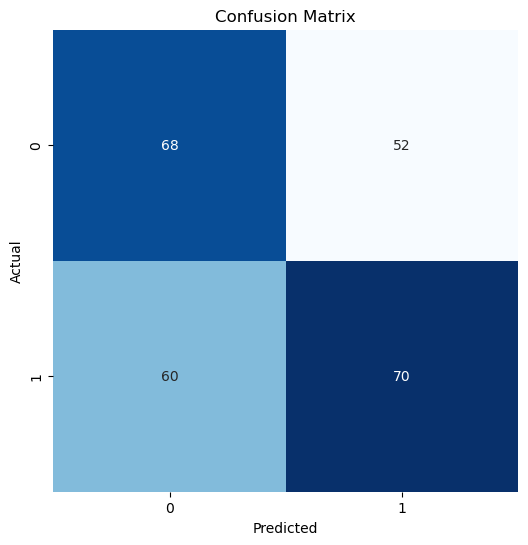

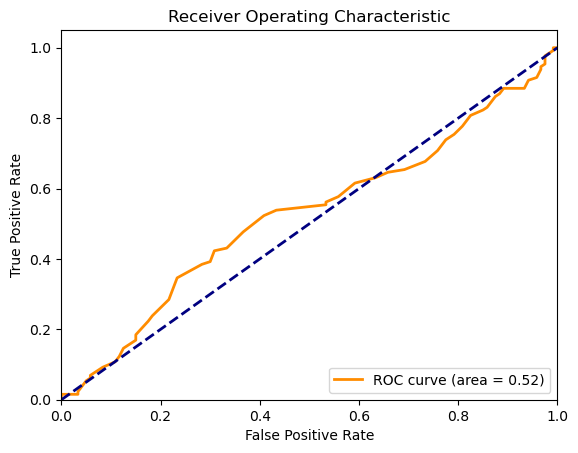

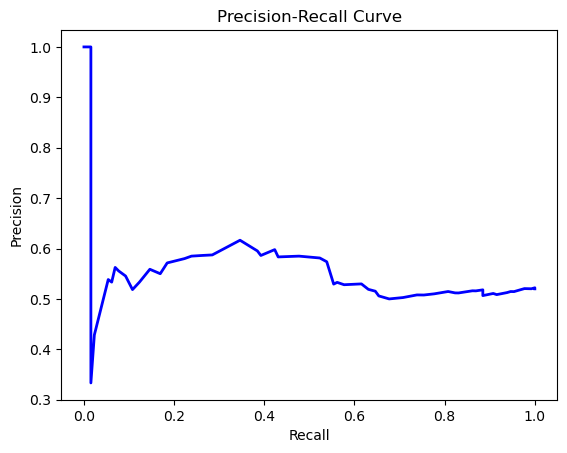

Training GradientBoosting
Evaluation for GradientBoosting:
              precision    recall  f1-score   support

           0       0.53      0.53      0.53       120
           1       0.56      0.57      0.57       130

    accuracy                           0.55       250
   macro avg       0.55      0.55      0.55       250
weighted avg       0.55      0.55      0.55       250

Accuracy: 0.548
F1 Score: 0.5670498084291188


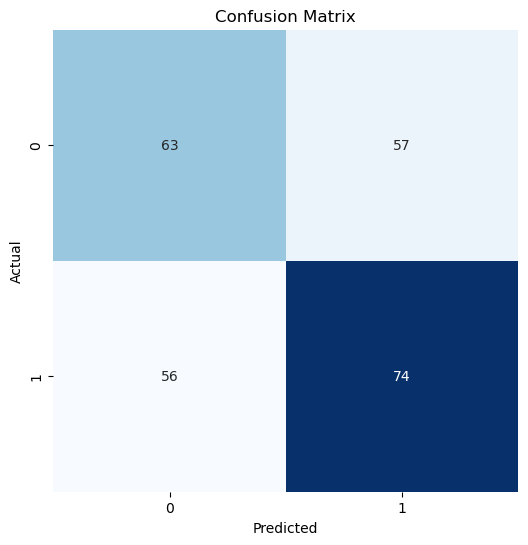

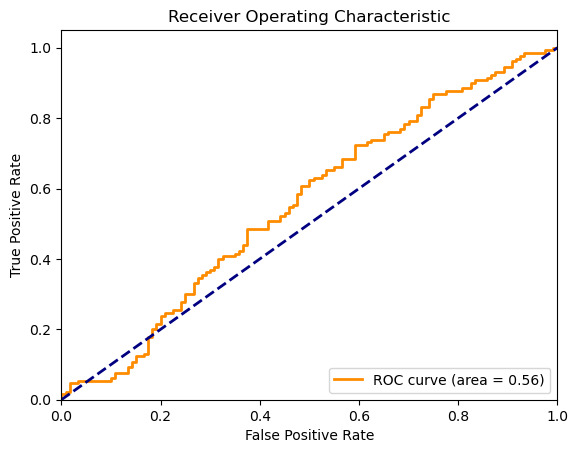

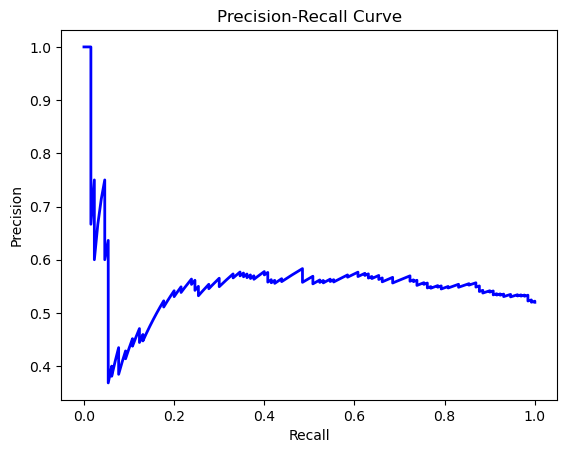

Training MLP
Evaluation for MLP:
              precision    recall  f1-score   support

           0       0.44      0.43      0.44       120
           1       0.49      0.50      0.49       130

    accuracy                           0.47       250
   macro avg       0.47      0.47      0.47       250
weighted avg       0.47      0.47      0.47       250

Accuracy: 0.468
F1 Score: 0.49429657794676807


C:\Users\Anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


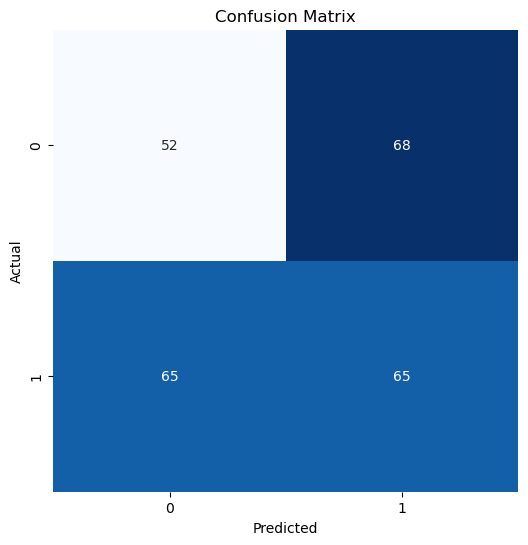

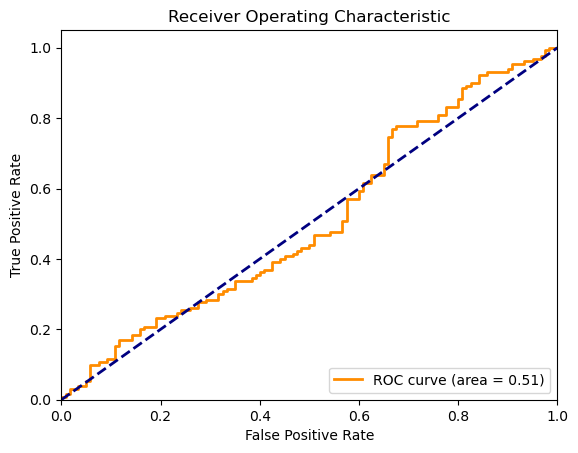

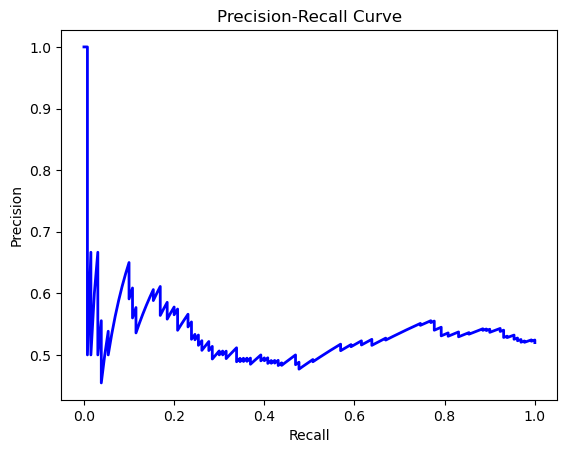

C:\Users\Anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training AdaBoost
Evaluation for AdaBoost:
              precision    recall  f1-score   support

           0       0.52      0.50      0.51       120
           1       0.55      0.57      0.56       130

    accuracy                           0.54       250
   macro avg       0.53      0.53      0.53       250
weighted avg       0.54      0.54      0.54       250

Accuracy: 0.536
F1 Score: 0.5606060606060606


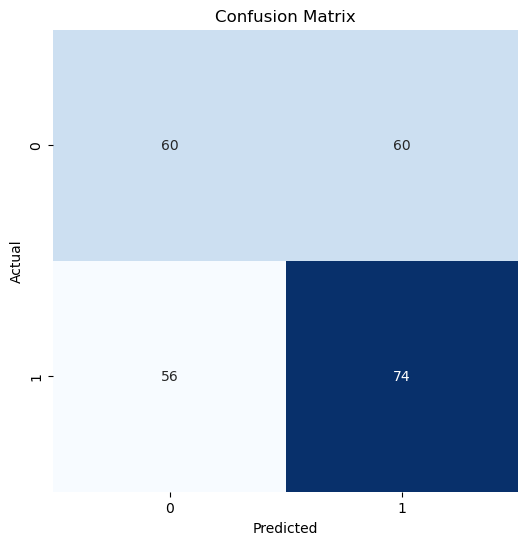

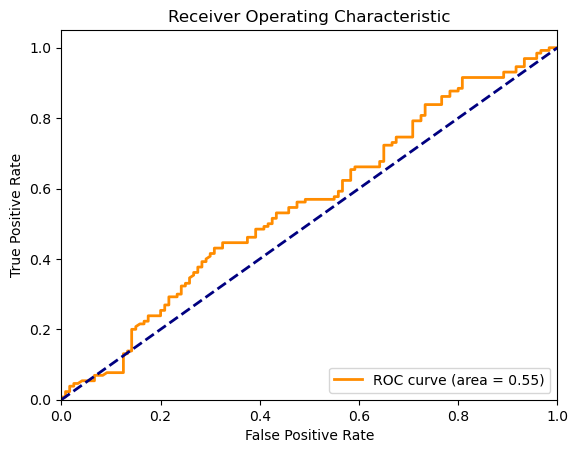

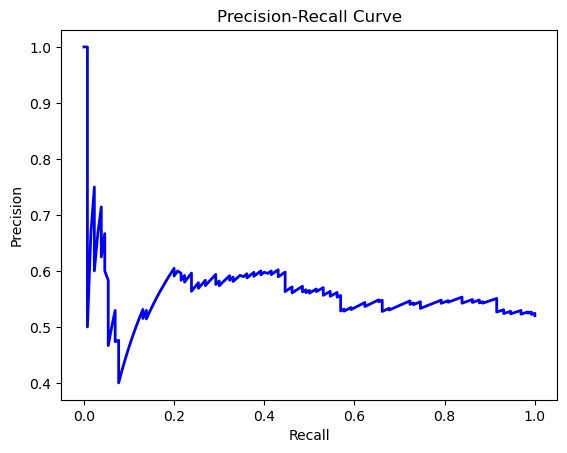

Training Bagging
Evaluation for Bagging:
              precision    recall  f1-score   support

           0       0.48      0.61      0.54       120
           1       0.52      0.39      0.45       130

    accuracy                           0.50       250
   macro avg       0.50      0.50      0.49       250
weighted avg       0.50      0.50      0.49       250

Accuracy: 0.496
F1 Score: 0.4473684210526316


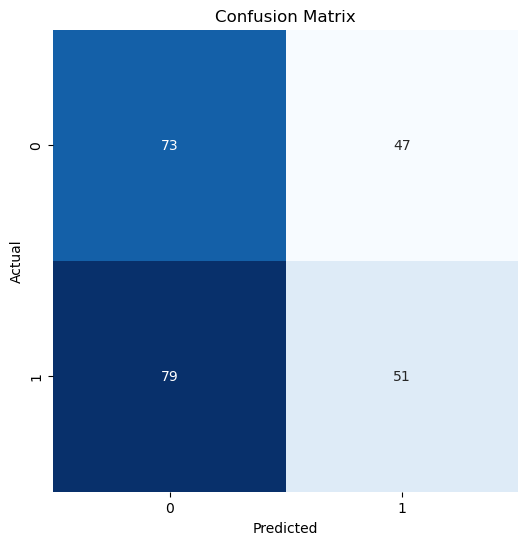

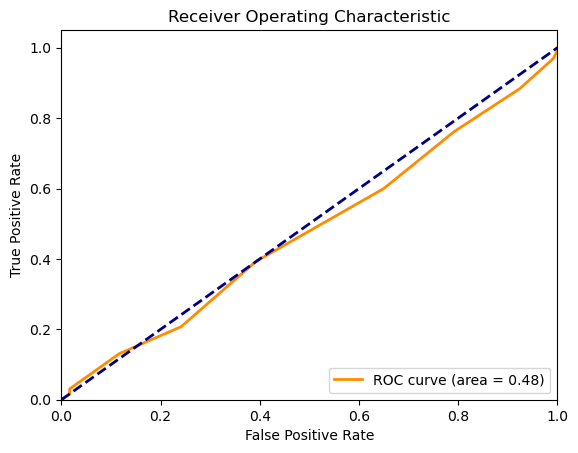

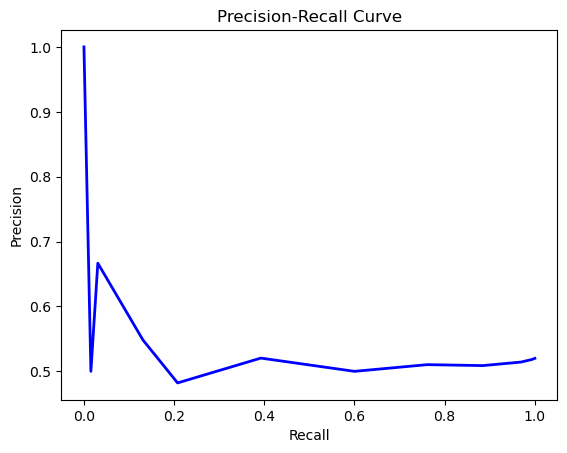

Training LGBM
[LightGBM] [Info] Number of positive: 494, number of negative: 504
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000230 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 919
[LightGBM] [Info] Number of data points in the train set: 998, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494990 -> initscore=-0.020041
[LightGBM] [Info] Start training from score -0.020041
Evaluation for LGBM:
              precision    recall  f1-score   support

           0       0.51      0.53      0.52       120
           1       0.55      0.53      0.54       130

    accuracy                           0.53       250
   macro avg       0.53      0.53      0.53       250
weighted avg       0.53      0.53      0.53       250

Accuracy: 0.528
F1 Score: 0.5390625


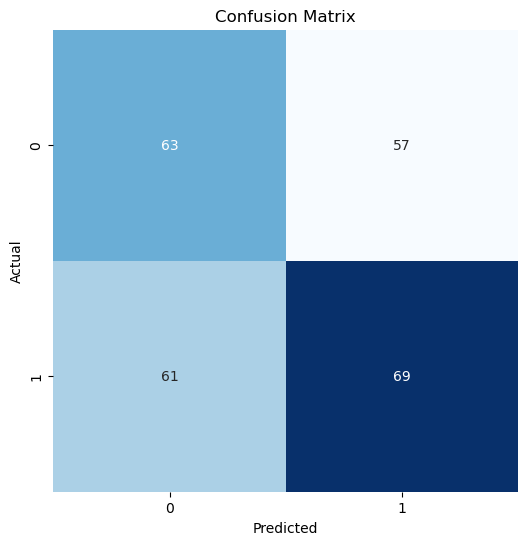

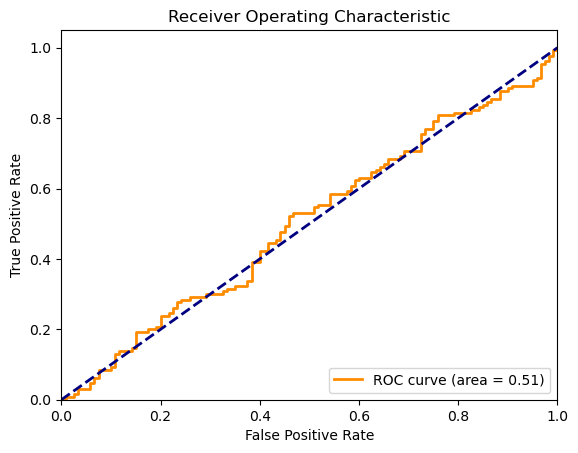

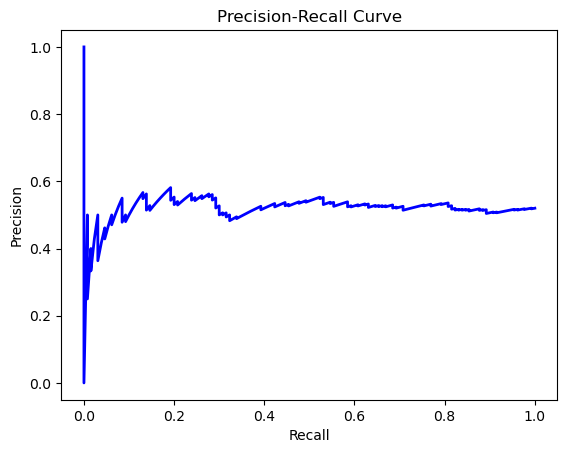

Training XGBoost
Evaluation for XGBoost:
              precision    recall  f1-score   support

           0       0.53      0.56      0.54       120
           1       0.57      0.54      0.55       130

    accuracy                           0.55       250
   macro avg       0.55      0.55      0.55       250
weighted avg       0.55      0.55      0.55       250

Accuracy: 0.548
F1 Score: 0.5533596837944664


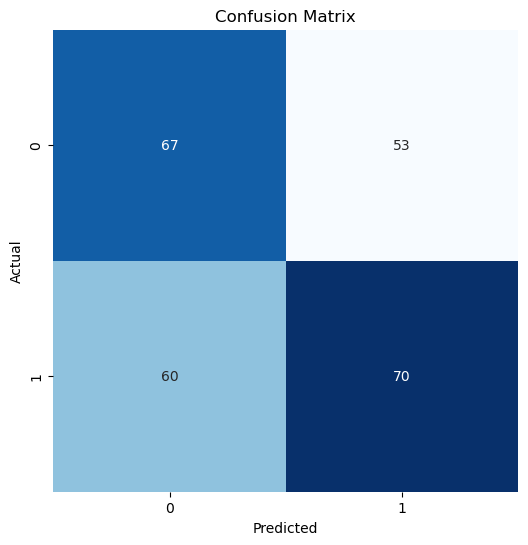

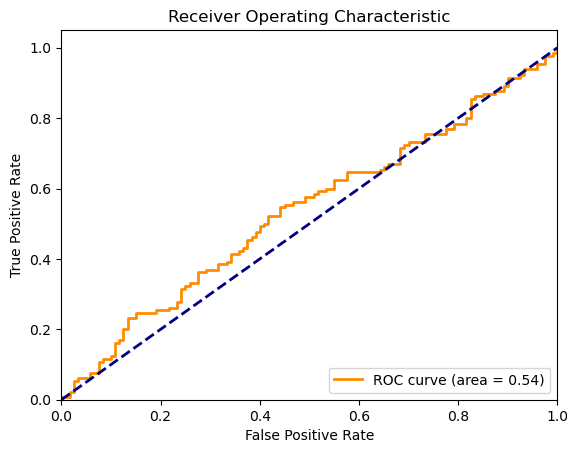

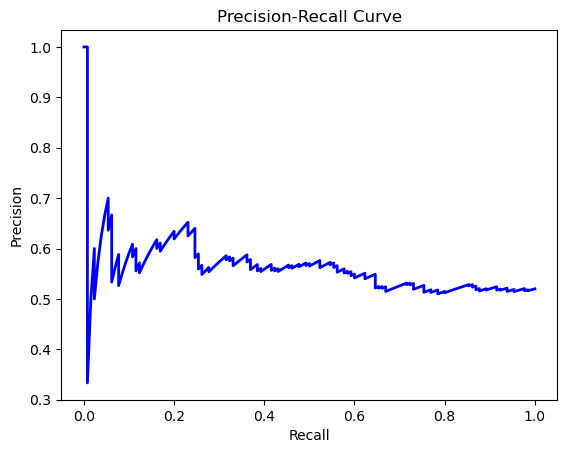

In [86]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, precision_recall_curve, f1_score
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Define models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'MLP': MLPClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42),
    'LGBM': LGBMClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# Function to evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")

    # Confusion Matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.figure()
    plt.plot(recall, precision, color='blue', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}")
    model.fit(X_train, y_train)
    print(f"Evaluation for {model_name}:")
    evaluate_model(model, X_test, y_test)


Evaluation for Tuned RandomForest:
              precision    recall  f1-score   support

           0       0.50      0.49      0.49       120
           1       0.53      0.54      0.54       130

    accuracy                           0.52       250
   macro avg       0.52      0.52      0.52       250
weighted avg       0.52      0.52      0.52       250

Accuracy: 0.516
F1 Score: 0.5363984674329502


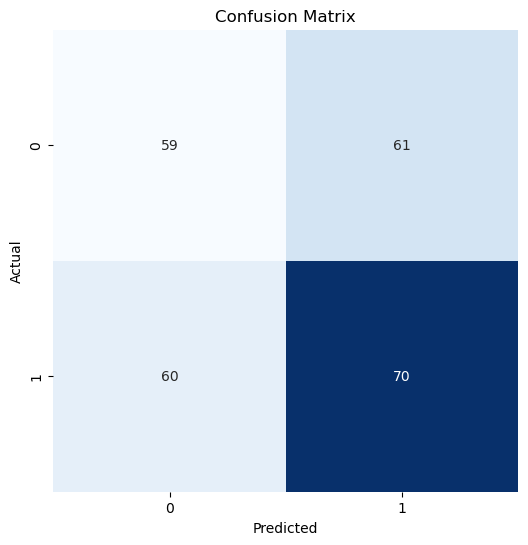

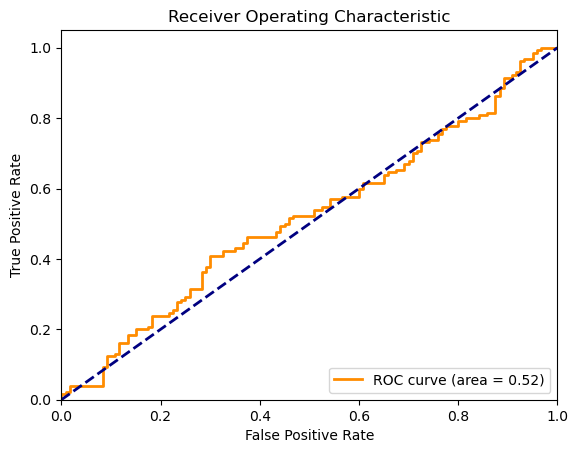

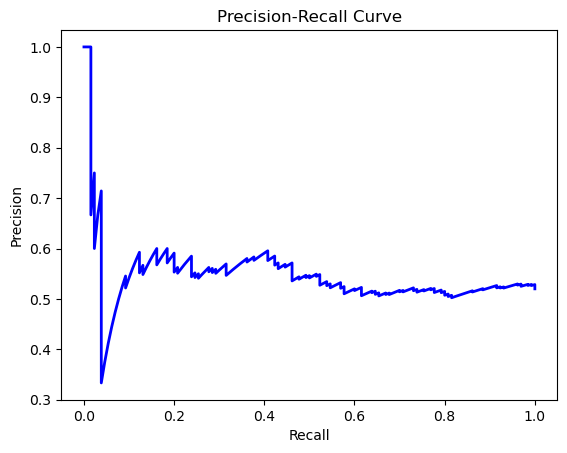

Evaluation for Tuned GradientBoosting:
              precision    recall  f1-score   support

           0       0.52      0.55      0.53       120
           1       0.56      0.52      0.54       130

    accuracy                           0.54       250
   macro avg       0.54      0.54      0.54       250
weighted avg       0.54      0.54      0.54       250

Accuracy: 0.536
F1 Score: 0.5396825396825397


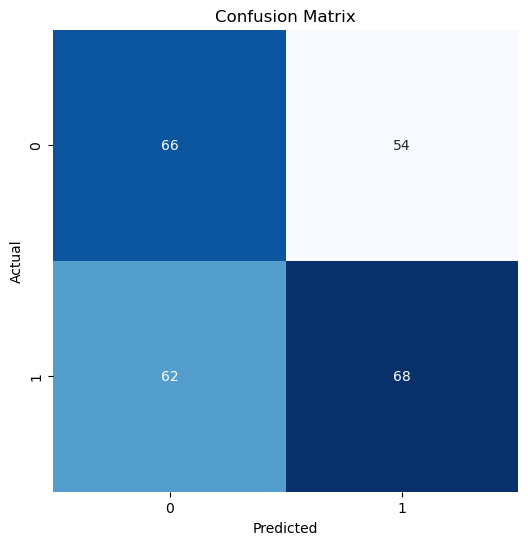

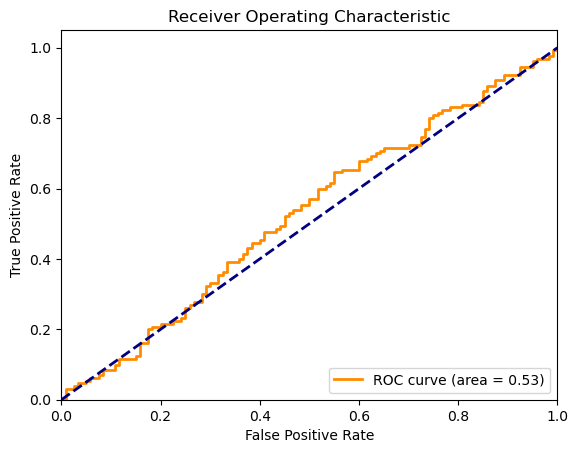

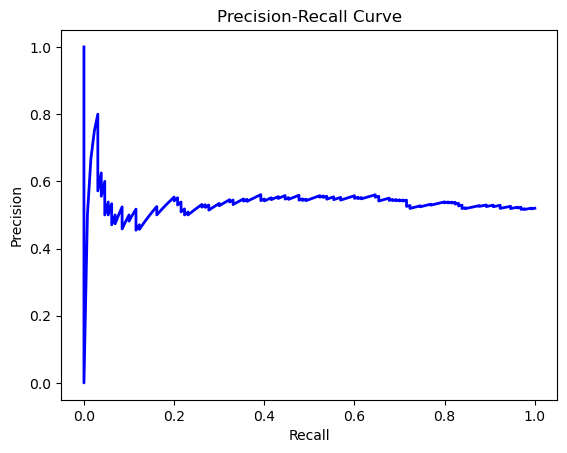

In [88]:
from skopt import BayesSearchCV

# Define hyperparameter search spaces for the best models (e.g., RandomForest and GradientBoosting)
param_grid_rf = {
    'classifier__n_estimators': Integer(50, 200),
    'classifier__max_depth': Integer(5, 20),
    'classifier__min_samples_split': Integer(2, 20),
    'classifier__min_samples_leaf': Integer(1, 10)
}

param_grid_gb = {
    'classifier__n_estimators': Integer(50, 200),
    'classifier__learning_rate': Real(0.01, 0.2, prior='uniform'),
    'classifier__max_depth': Integer(3, 7)
}

# Function to create a pipeline
def create_pipeline(model):
    return Pipeline(steps=[('classifier', model)])

# Function to perform BayesSearchCV
def bayes_search_cv(model, param_grid):
    bayes_search = BayesSearchCV(create_pipeline(model), param_grid, n_iter=50, cv=5, n_jobs=-1, scoring='f1', random_state=42)
    bayes_search.fit(X_train, y_train)
    return bayes_search.best_estimator_

# Perform BayesSearchCV for RandomForest and GradientBoosting
best_rf = bayes_search_cv(RandomForestClassifier(random_state=42), param_grid_rf)
best_gb = bayes_search_cv(GradientBoostingClassifier(random_state=42), param_grid_gb)

# Evaluate the tuned models
print("Evaluation for Tuned RandomForest:")
evaluate_model(best_rf, X_test, y_test)
print("Evaluation for Tuned GradientBoosting:")
evaluate_model(best_gb, X_test, y_test)


Final Evaluation for Tuned RandomForest:
              precision    recall  f1-score   support

           0       0.50      0.49      0.49       120
           1       0.53      0.54      0.54       130

    accuracy                           0.52       250
   macro avg       0.52      0.52      0.52       250
weighted avg       0.52      0.52      0.52       250

Accuracy: 0.516
F1 Score: 0.5363984674329502


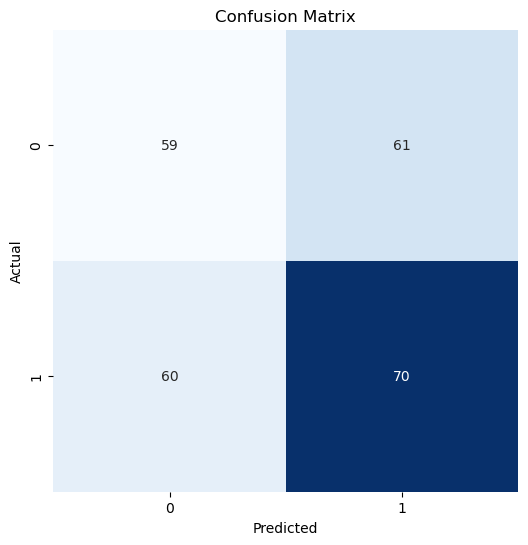

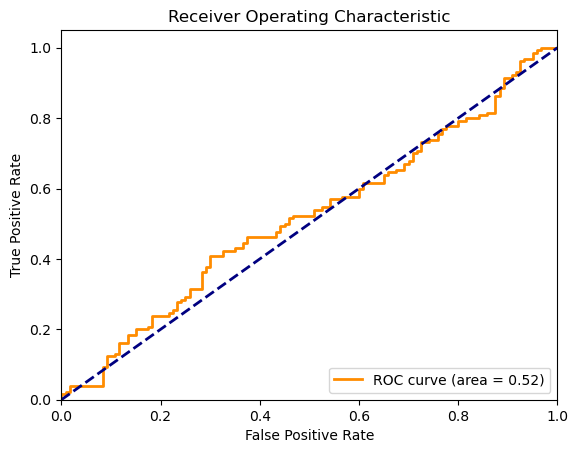

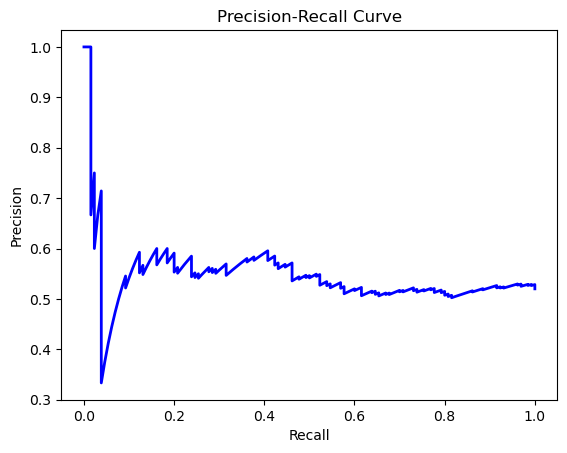

Final Evaluation for Tuned GradientBoosting:
              precision    recall  f1-score   support

           0       0.52      0.55      0.53       120
           1       0.56      0.52      0.54       130

    accuracy                           0.54       250
   macro avg       0.54      0.54      0.54       250
weighted avg       0.54      0.54      0.54       250

Accuracy: 0.536
F1 Score: 0.5396825396825397


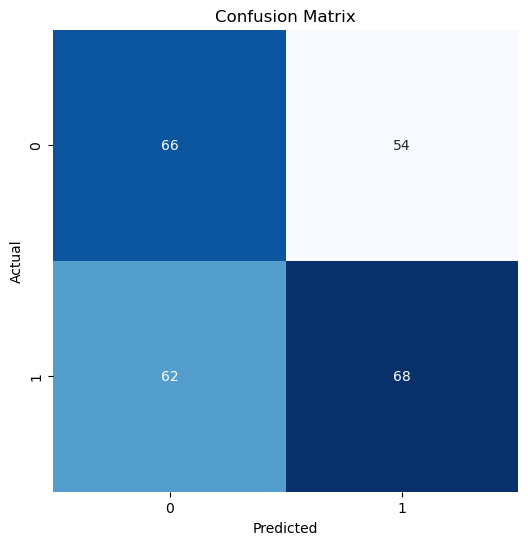

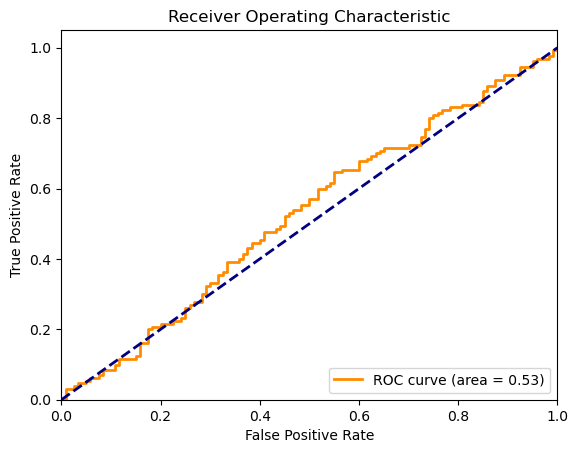

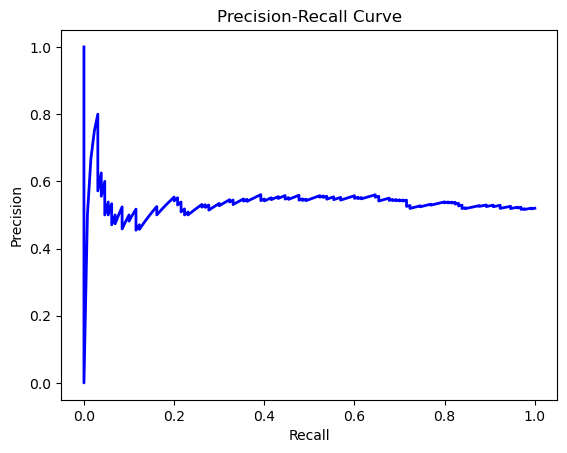

Final Evaluation for MLP:
              precision    recall  f1-score   support

           0       0.44      0.43      0.44       120
           1       0.49      0.50      0.49       130

    accuracy                           0.47       250
   macro avg       0.47      0.47      0.47       250
weighted avg       0.47      0.47      0.47       250

Accuracy: 0.468
F1 Score: 0.49429657794676807


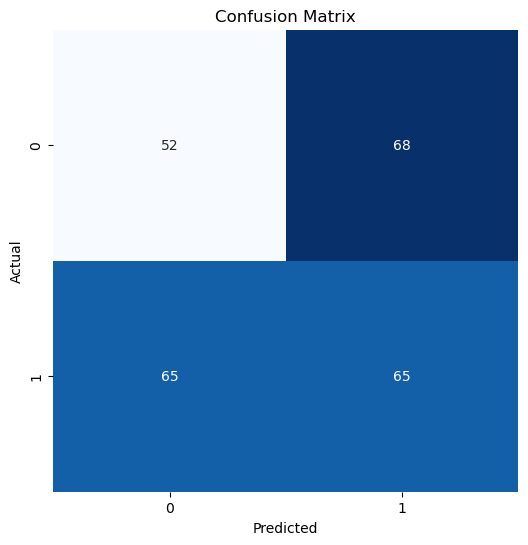

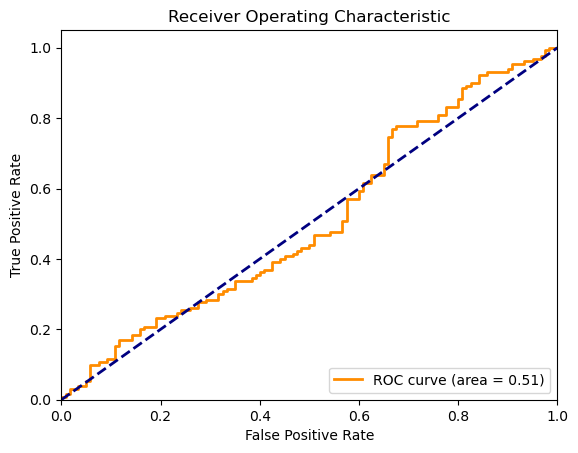

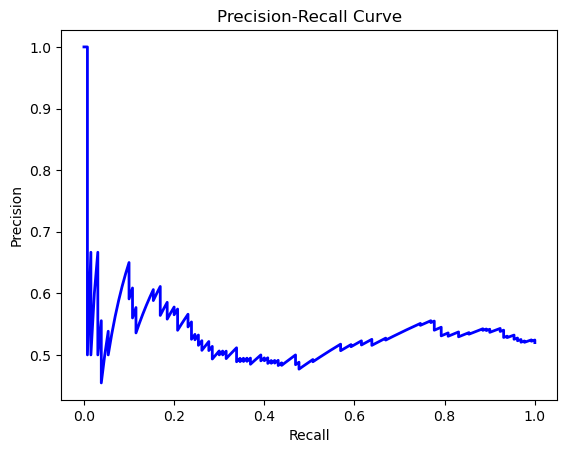

Final Evaluation for AdaBoost:
              precision    recall  f1-score   support

           0       0.52      0.50      0.51       120
           1       0.55      0.57      0.56       130

    accuracy                           0.54       250
   macro avg       0.53      0.53      0.53       250
weighted avg       0.54      0.54      0.54       250

Accuracy: 0.536
F1 Score: 0.5606060606060606


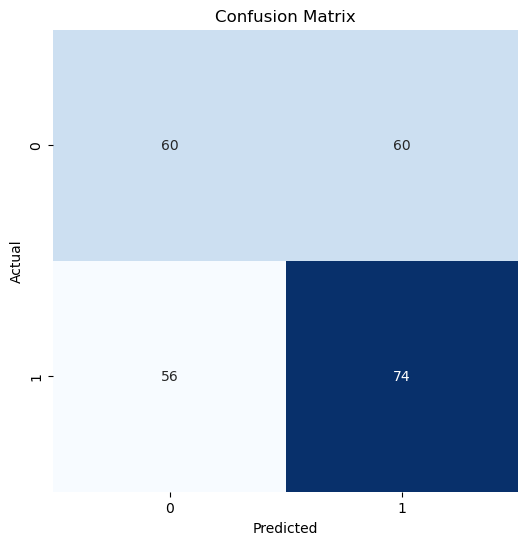

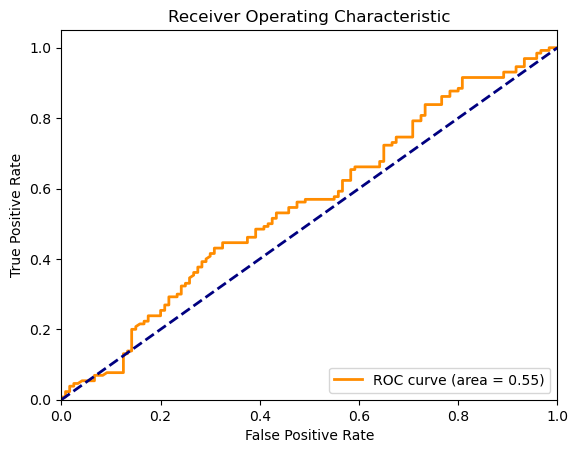

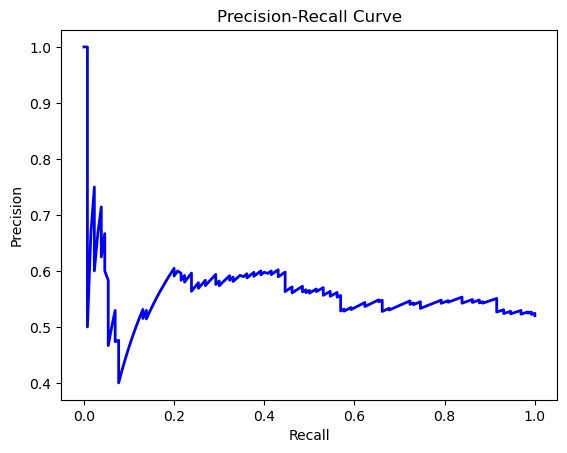

Final Evaluation for Bagging:
              precision    recall  f1-score   support

           0       0.48      0.61      0.54       120
           1       0.52      0.39      0.45       130

    accuracy                           0.50       250
   macro avg       0.50      0.50      0.49       250
weighted avg       0.50      0.50      0.49       250

Accuracy: 0.496
F1 Score: 0.4473684210526316


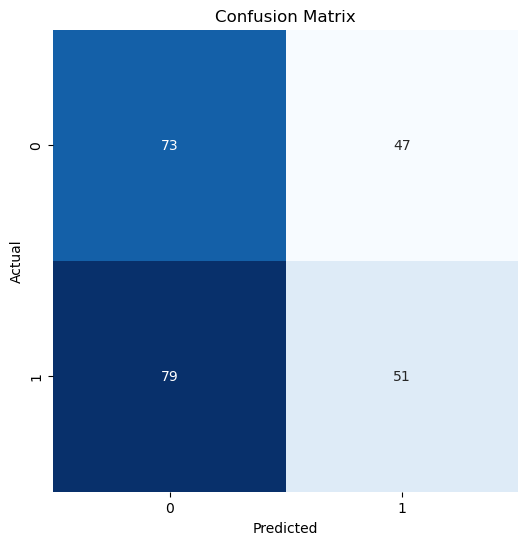

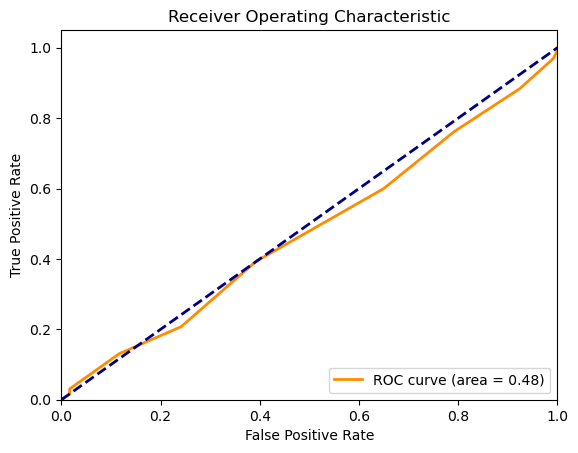

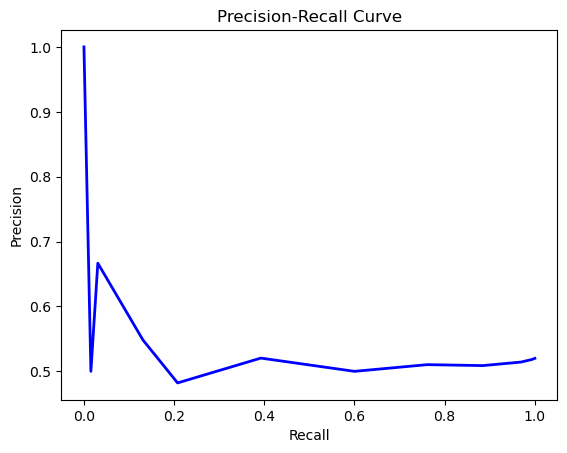

Final Evaluation for LGBM:
              precision    recall  f1-score   support

           0       0.51      0.53      0.52       120
           1       0.55      0.53      0.54       130

    accuracy                           0.53       250
   macro avg       0.53      0.53      0.53       250
weighted avg       0.53      0.53      0.53       250

Accuracy: 0.528
F1 Score: 0.5390625


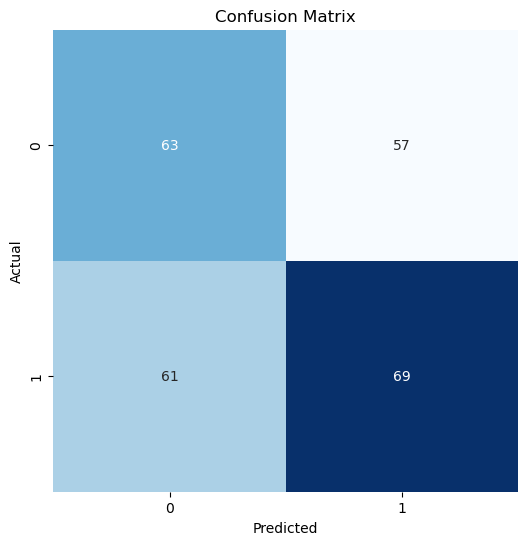

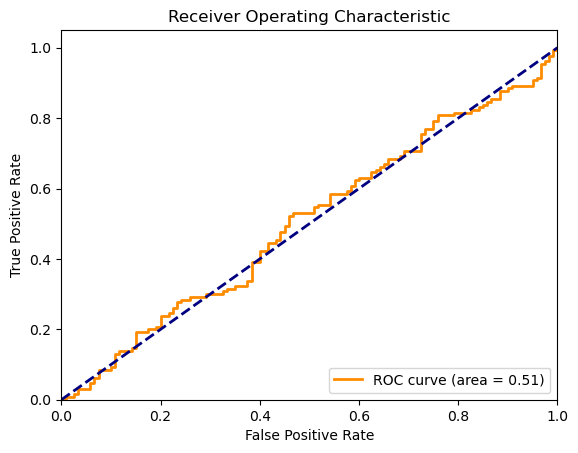

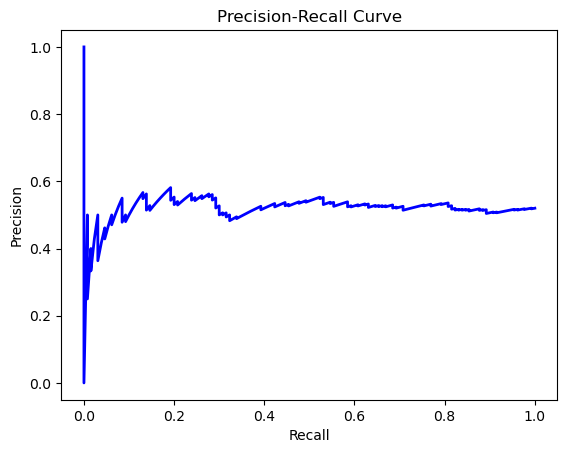

Final Evaluation for XGBoost:
              precision    recall  f1-score   support

           0       0.53      0.56      0.54       120
           1       0.57      0.54      0.55       130

    accuracy                           0.55       250
   macro avg       0.55      0.55      0.55       250
weighted avg       0.55      0.55      0.55       250

Accuracy: 0.548
F1 Score: 0.5533596837944664


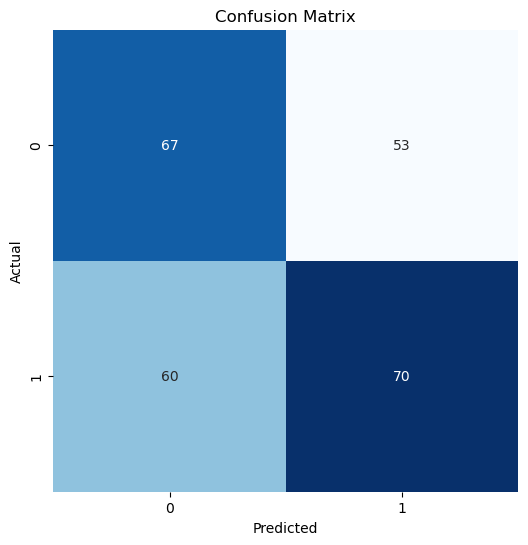

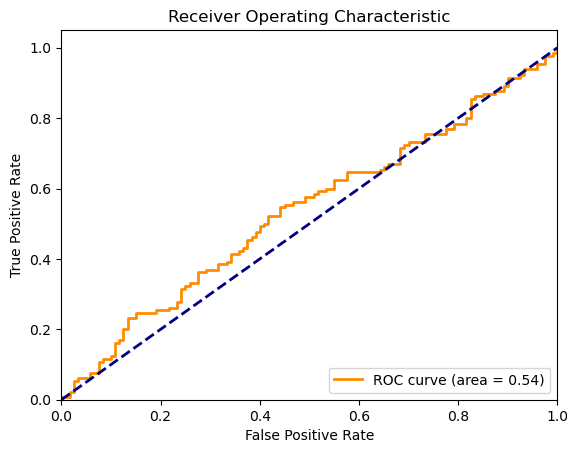

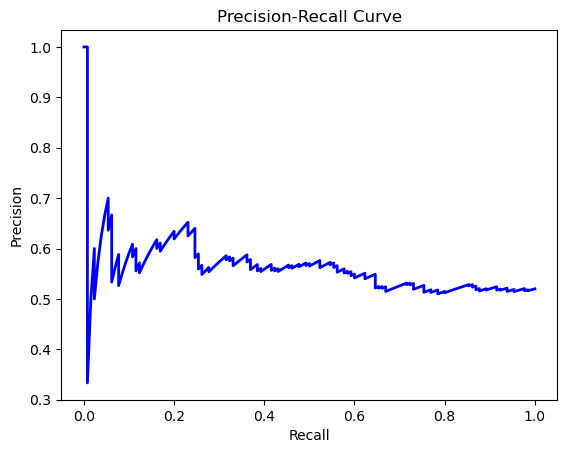

In [90]:
# Train and evaluate the final models
final_models = {
    'Tuned RandomForest': best_rf,
    'Tuned GradientBoosting': best_gb,
    'MLP': models['MLP'],
    'AdaBoost': models['AdaBoost'],
    'Bagging': models['Bagging'],
    'LGBM': models['LGBM'],
    'XGBoost': models['XGBoost']
}

for model_name, model in final_models.items():
    print(f"Final Evaluation for {model_name}:")
    evaluate_model(model, X_test, y_test)
